In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
age=[21,20,22,22,23,21,25,30,31]
age=pd.DataFrame(age, columns=['age'])
age

,age
0,21
1,20
2,22
3,22
4,23
5,21
6,25
7,30
8,31


In [3]:
income=[60,55,60,61,65,62,65,70,68]
income=pd.DataFrame(income, columns=['income'])
income

,income
0,60
1,55
2,60
3,61
4,65
5,62
6,65
7,70
8,68


In [4]:
df=pd.concat([age,income], axis=1)
df

,age,income
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65
5,21,62
6,25,65
7,30,70
8,31,68


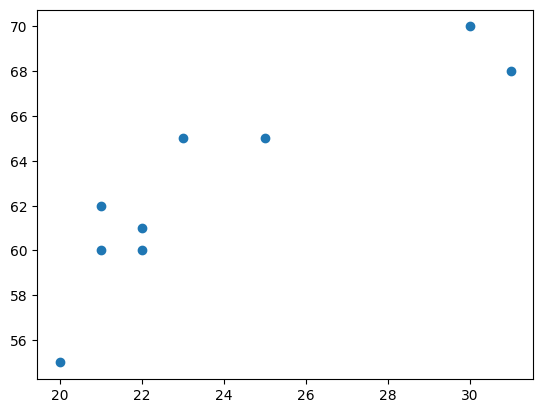

In [5]:
plt.scatter(age,income)

## Score Function

In [6]:
def watchRegressorResult(x,y,model, c, m):      
    score=model.score(x,y)
    py=model.predict(x)
    r2=r2_score(y,py)
    mse=mean_squared_error(y, py)
    mae=mean_absolute_error(y, py)
    if m==True and c==True:
        #print(f"Slope is {model.coef_} and Intercept is {model.intercept_} and Score is {score} and r2_score is {r2} and MsE is {mse} and MAE is {mae}")
        print(f"\033[9mSlop is\033[94m {model.coef_} and \033[92mIntercept is {model.intercept_}\033[92m, \033[94mScore is {score}, \033[94mr2_score is {r2}\033[0m, \033[91m MSE is {mse}\033[91m, \033[91m MAE is {mae}\033[91m")
    else:
        print(f"\033[94mScore is {score}, \033[94mr2_score is {r2}\033[0m, \033[91m MSE is {mse}\033[91m, \033[91m MAE is {mae}\033[91m")

## KNN Classifier

In [7]:
knnCl=KNeighborsClassifier(n_neighbors=3, weights='distance')

In [8]:
knnCl.fit(age,income)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [9]:
knnCl.predict([[22]])

array([60], dtype=int64)

In [10]:
watchRegressorResult(age,income,knnCl,False,False)

Score is 0.7777777777777778, r2_score is 0.9703947368421053,  MSE is 0.5555555555555556,  MAE is 0.3333333333333333


## KNN Regressor

In [11]:
knnRe=KNeighborsRegressor(n_neighbors=3, weights='uniform')

In [12]:
knnRe.fit(age,income)

KNeighborsRegressor(n_neighbors=3)

In [13]:
knnRe.predict([[22]])

array([[60.33333333]])

In [14]:
watchRegressorResult(age,income,knnRe,False,False)

Score is 0.7401315789473687, r2_score is 0.7401315789473687,  MSE is 4.876543209876539,  MAE is 1.8148148148148135


## OLS

In [15]:
lreg=LinearRegression()

In [16]:
lreg.fit(age,income)

LinearRegression()

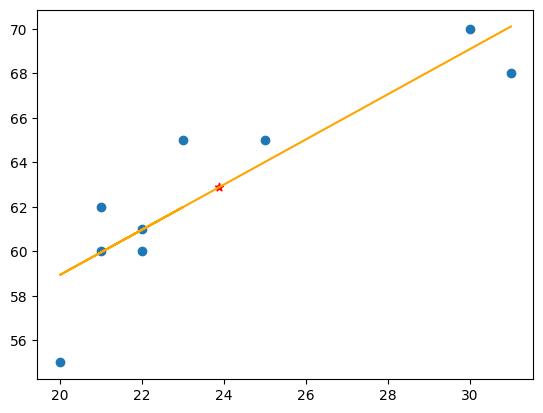

In [17]:
plt.scatter(age,income)
plt.scatter(age.mean(),income.mean(),marker='*', color='red')
plt.plot(age,lreg.predict(df[['age']]), color='orange')

In [18]:
watchRegressorResult(age,income,lreg, True, True)

Slop is [[1.01551724]] and Intercept is [38.62931034], Score is 0.7870258620689655, r2_score is 0.7870258620689655,  MSE is 3.996551724137932,  MAE is 1.5601532567049818


## Ridge

In [19]:
lregR=Ridge(alpha=2)

In [20]:
lregR.fit(age,income)

Ridge(alpha=2)

In [21]:
lregR.coef_, lregR.intercept_

(array([[1.]]), array([39.]))

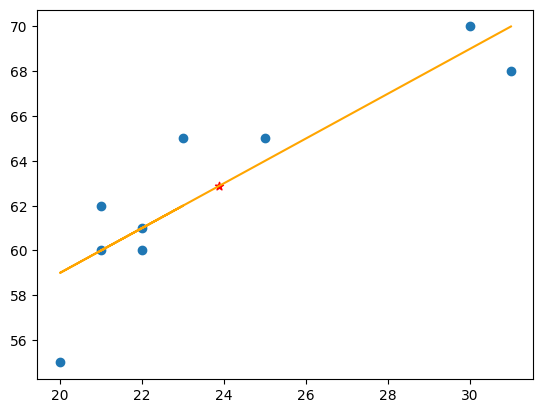

In [22]:
plt.scatter(age,income)
plt.scatter(age.mean(),income.mean(),marker='*', color='red')
plt.plot(age,lregR.predict(df[['age']]), color='orange')

In [23]:
watchRegressorResult(age,income,lregR,True,True)

Slop is [[1.]] and Intercept is [39.], Score is 0.7868421052631579, r2_score is 0.7868421052631579,  MSE is 4.0,  MAE is 1.5555555555555556


## Polynomial

In [24]:
poly=PolynomialFeatures(degree=2)

In [25]:
xpoly=poly.fit_transform(age)
xpoly.shape

(9, 3)

In [26]:
preg=LinearRegression()

In [27]:
preg.fit(xpoly,income)

LinearRegression()

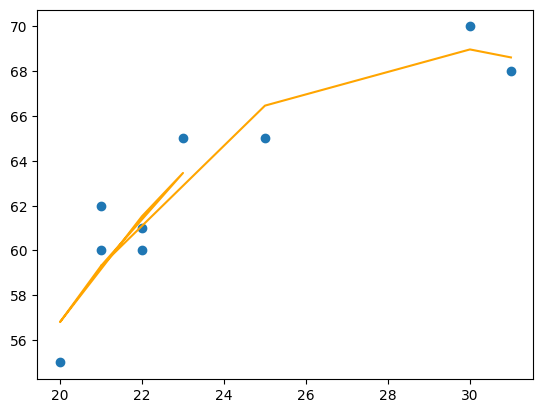

In [28]:
plt.scatter(age,income)
plt.plot(age,preg.predict(xpoly), color='orange')

In [29]:
watchRegressorResult(xpoly,income,preg,True,True)

Slop is [[ 0.          8.3709667  -0.14307813]] and Intercept is [-53.38349684], Score is 0.8842959467041909, r2_score is 0.8842959467041909,  MSE is 2.171236555674442,  MAE is 1.3212701441079955
